# 🎮 Matiks GameVision Insights Suite

> **Welcome!** This notebook guides you through loading, cleaning, exploring, and engineering features for the Matiks GameVision Insights Suite. Each step includes clear explanations and professional visualizations to help you understand and prepare your data for dashboarding and modeling.

## 1️⃣ Step 1: Import Libraries
In this step, we import the necessary libraries that will be used throughout the project. 

- `pandas` for data handling
- `matplotlib` and `seaborn` for visualization
- `numpy` for numerical operations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates

## 2️⃣ Step 2: Load the Dataset
We will load the data directly from your Google Sheets link as a CSV file. This ensures we are always working with the latest data. 📥

In [2]:
# Use the export link to get CSV format
dataset_url = "https://docs.google.com/spreadsheets/d/1NyFJYCi5wF8QD0FIfxlyvYKksnnbKExzXOjioE_1hWA/export?format=csv"
df = pd.read_csv(dataset_url)
df.head()

,User_ID,Username,Email,Signup_Date,Country,Age,Gender,Device_Type,Game_Title,Total_Play_Sessions,Avg_Session_Duration_Min,Total_Hours_Played,In_Game_Purchases_Count,Total_Revenue_USD,Last_Login,Subscription_Tier,Referral_Source,Preferred_Game_Mode,Rank_Tier,Achievement_Score
0,7280e6c4-6f7c-45dd-a8fc-c58389ea8e07,geoffreyanderson,haleymitchell@gmail.com,15-Dec-2024,Austria,22,Other,Mobile,MysticWar,21,5.78,38.41,6,27.50,19-May-2025,Silver,Social Media,Co-op,Bronze,8721
1,23c48d4f-f5d0-4ff4-ba0f-2007441b9b57,riverachristian,masonmelissa@hotmail.com,07-Mar-2024,Gabon,22,Other,PC,QuestRaid,22,32.53,129.02,10,2.50,12-May-2025,Gold,Ads,Solo,Bronze,3572
2,cf8d530c-c137-4346-a78b-e76e36d45e2a,brownchris,mnichols@mcmillan.net,19-Oct-2023,Ireland,36,Female,PC,QuestRaid,12,21.55,62.50,5,25.56,03-May-2025,Silver,Organic,Solo,Platinum,1060
3,47fcbe87-a1c1-40c3-b450-1b5692f61538,christopher90,ttaylor@gmail.com,28-Sep-2023,Belarus,23,Other,PC,QuestRaid,19,28.36,79.40,4,132.25,08-May-2025,Silver,Friend,Multiplayer,Diamond,3591
4,0b620a32-9e77-4b4a-9931-f0b654bef095,vfreeman,amanda80@gmail.com,09-Aug-2024,Slovenia,26,Other,PC,QuestRaid,18,17.63,86.70,6,20.79,24-Apr-2025,Free,Friend,Multiplayer,Diamond,2666


## 3️⃣ Step 3: Check Columns
🔎 Let's see which columns are in the dataset and check if any are missing. The expected columns are based on the Matiks data schema.

In [3]:
print("Columns in dataset:", df.columns.tolist())
expected = ['User_ID', 'Username', 'Email', 'Signup_Date', 'Country', 'Age', 'Gender', 'Device_Type', 'Game_Title', 'Total_Play_Sessions', 'Avg_Session_Duration_Min', 'Total_Hours_Played', 'In_Game_Purchases_Count', 'Total_Revenue_USD', 'Last_Login', 'Subscription_Tier', 'Referral_Source', 'Preferred_Game_Mode', 'Rank_Tier', 'Achievement_Score']
for col in expected:
    if col not in df.columns:
        print(f"Missing column: {col}")

Columns in dataset: ['User_ID', 'Username', 'Email', 'Signup_Date', 'Country', 'Age', 'Gender', 'Device_Type', 'Game_Title', 'Total_Play_Sessions', 'Avg_Session_Duration_Min', 'Total_Hours_Played', 'In_Game_Purchases_Count', 'Total_Revenue_USD', 'Last_Login', 'Subscription_Tier', 'Referral_Source', 'Preferred_Game_Mode', 'Rank_Tier', 'Achievement_Score']


## 4️⃣ Step 4: Check for Missing Values
🕳️ We will check for missing values in each column and display a sample of rows with missing data. Handling missing values is crucial for reliable analysis.

In [4]:
df.isnull().sum()

User_ID                     0
Username                    0
Email                       0
Signup_Date                 0
Country                     0
Age                         0
Gender                      0
Device_Type                 0
Game_Title                  0
Total_Play_Sessions         0
Avg_Session_Duration_Min    0
Total_Hours_Played          0
In_Game_Purchases_Count     0
Total_Revenue_USD           0
Last_Login                  0
Subscription_Tier           0
Referral_Source             0
Preferred_Game_Mode         0
Rank_Tier                   0
Achievement_Score           0
dtype: int64

## 5️⃣ Step 5: Check for Duplicates
🧹 Let's see if there are any duplicate rows in the data. Removing duplicates ensures data quality and prevents bias.

In [5]:
duplicates = df.duplicated().sum()
print("Duplicate rows:", duplicates)
if duplicates > 0:
    display(df[df.duplicated()])

Duplicate rows: 0


## 6️⃣ Step 6: Check for Negative Revenue
🚩 Negative revenue values may indicate data entry errors or refunds. Let's identify any such cases in Total_Revenue_USD.

In [6]:
neg_revenue = df[df['Total_Revenue_USD'] < 0]
print(f"Negative revenue rows: {len(neg_revenue)}")
neg_revenue.head()

Negative revenue rows: 0


,User_ID,Username,Email,Signup_Date,Country,Age,Gender,Device_Type,Game_Title,Total_Play_Sessions,Avg_Session_Duration_Min,Total_Hours_Played,In_Game_Purchases_Count,Total_Revenue_USD,Last_Login,Subscription_Tier,Referral_Source,Preferred_Game_Mode,Rank_Tier,Achievement_Score


## 7️⃣ Step 7: Basic Statistics
📊 Let's look at some basic statistics for the numeric columns, especially Total_Revenue_USD, Age, and Achievement_Score. This helps us understand the data's range and distribution.

In [7]:
print(df[['Total_Revenue_USD', 'Age', 'Achievement_Score', 'Total_Play_Sessions', 'Avg_Session_Duration_Min', 'Total_Hours_Played', 'In_Game_Purchases_Count']].describe())
print("\nUnique device types:", df['Device_Type'].unique())
print("Unique subscription tiers:", df['Subscription_Tier'].unique())
print("Unique preferred game modes:", df['Preferred_Game_Mode'].unique())

       Total_Revenue_USD           Age  Achievement_Score  \
count       10000.000000  10000.000000       10000.000000   
mean           50.177466     31.063700        5009.304400   
std            49.600884     10.687547        2895.010702   
min             0.000000     13.000000           0.000000   
25%            14.900000     22.000000        2481.750000   
50%            34.760000     31.000000        5067.000000   
75%            69.225000     40.000000        7498.250000   
max           428.590000     49.000000        9997.000000   

       Total_Play_Sessions  Avg_Session_Duration_Min  Total_Hours_Played  \
count         10000.000000              10000.000000        10000.000000   
mean             19.993900                 30.035238          100.216981   
std               4.492314                 10.062647           49.642141   
min               6.000000                 -5.640000          -89.730000   
25%              17.000000                 23.210000           66.4900

## Step 7A: Distribution of Key Variables
📈 We will examine the distribution of key numeric variables such as Age, Total_Hours_Played, and Total_Revenue_USD using histograms and boxplots. These plots help us understand the central tendency, dispersion, and shape of the distribution for each variable.

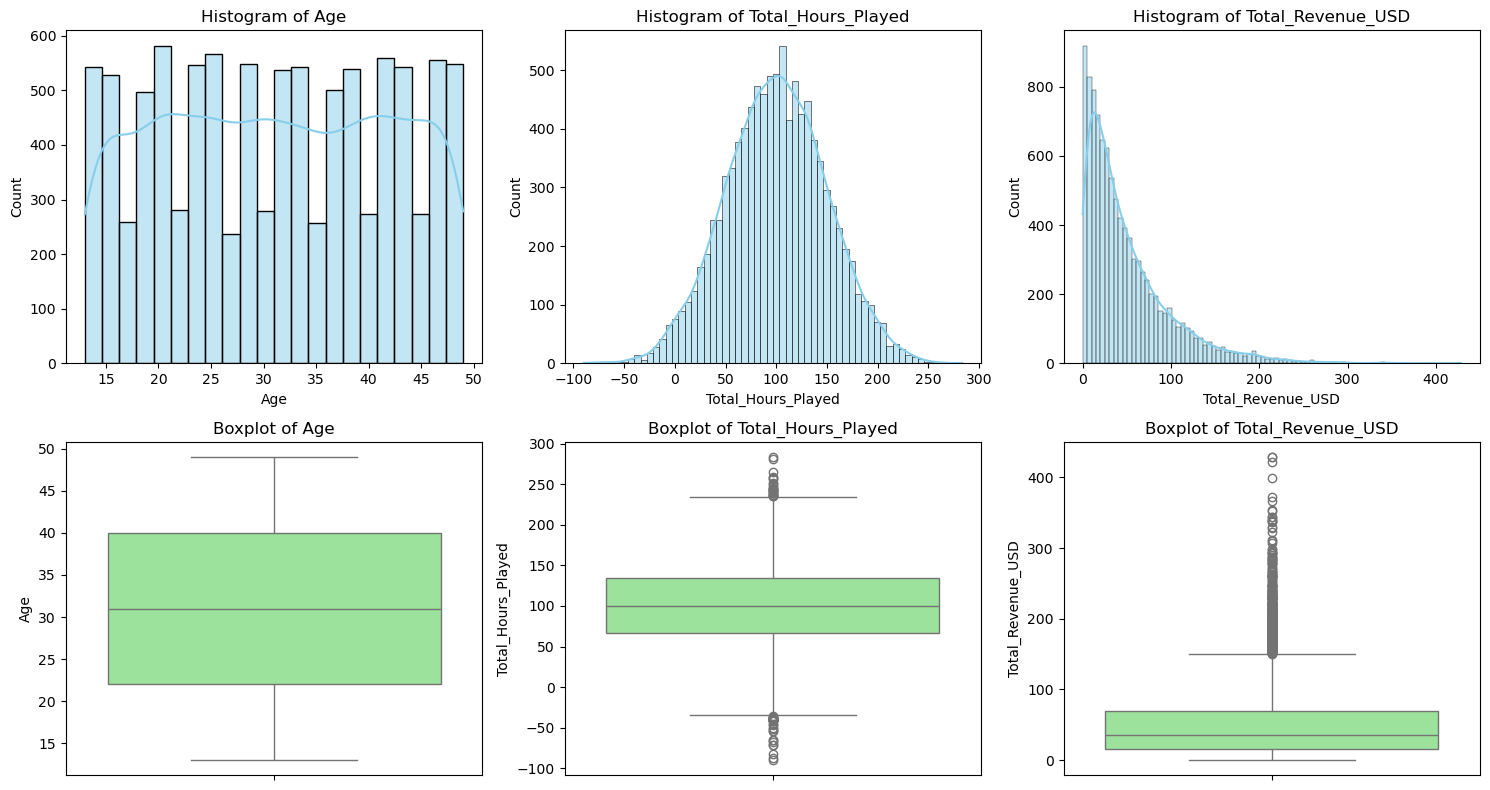

In [8]:
numeric_vars = ['Age', 'Total_Hours_Played', 'Total_Revenue_USD']
fig, axes = plt.subplots(2, len(numeric_vars), figsize=(5*len(numeric_vars), 8))
for i, var in enumerate(numeric_vars):
    sns.histplot(df[var].dropna(), ax=axes[0, i], kde=True, color='skyblue')
    axes[0, i].set_title(f'Histogram of {var}')
    sns.boxplot(y=df[var], ax=axes[1, i], color='lightgreen')
    axes[1, i].set_title(f'Boxplot of {var}')
plt.tight_layout()
plt.show()

## Step 7B: Bar Charts for Categorical Variables
🧩 Visualize the distribution of key categorical variables such as Device_Type, Subscription_Tier, and Preferred_Game_Mode to understand user segments.

### 📊 Executive Summary: User Segmentation by Key Categories

Understanding the distribution of users across device types, subscription tiers, and preferred game modes is crucial for strategic decision-making. These insights help identify dominant user segments, inform marketing strategies, and guide product development. By visualizing these categories, executives can quickly spot opportunities for growth, potential areas for user acquisition, and segments that may require targeted engagement.

**Key Questions Addressed:**
- Which device types are most popular among users?
- How are users distributed across subscription tiers?
- What are the most preferred game modes?

The following bar charts provide a clear, visual breakdown of these critical user segments.

C:\Users\srini\AppData\Local\Temp\ipykernel_7840\1872462497.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, ax=axes[i], palette='pastel')
C:\Users\srini\AppData\Local\Temp\ipykernel_7840\1872462497.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, ax=axes[i], palette='pastel')
C:\Users\srini\AppData\Local\Temp\ipykernel_7840\1872462497.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, ax=axes[i], palette='pastel')


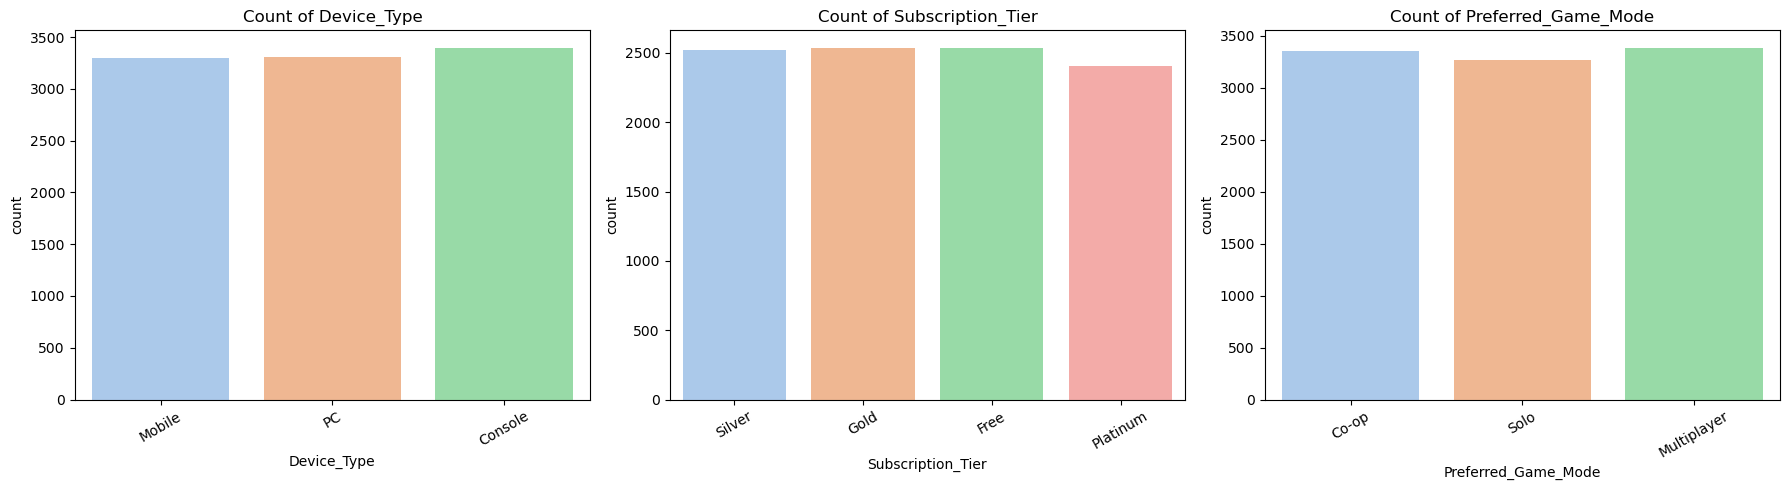

In [9]:
cat_vars = ['Device_Type', 'Subscription_Tier', 'Preferred_Game_Mode']
fig, axes = plt.subplots(1, len(cat_vars), figsize=(6*len(cat_vars), 5))
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, data=df, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Count of {var}')
    axes[i].tick_params(axis='x', rotation=30)
plt.tight_layout()
plt.show()

### 📝 Key Takeaways & Executive Recommendations

- **Device Type:** Focus marketing and feature development on the most popular device(s) to maximize user engagement and retention.
- **Subscription Tier:** Identify opportunities to upsell or cross-sell users in lower tiers, and analyze what drives premium subscriptions.
- **Preferred Game Mode:** Tailor in-game events, content, and promotions to the most popular game modes to boost user satisfaction and revenue.

> **Actionable Next Steps:**
> - Consider targeted campaigns for underrepresented segments.
> - Use these insights to inform A/B testing, feature rollouts, and partnership strategies.

These findings provide a foundation for data-driven executive decisions and ongoing user growth.

### 🧩 Executive Insight: User Segmentation by Category

> **Why it matters:** Understanding the distribution of users by device, subscription, and game mode helps identify key segments for marketing and product focus. 

- **Device Type:** Reveals platform popularity (e.g., mobile vs. desktop).
- **Subscription Tier:** Shows conversion to paid tiers.
- **Preferred Game Mode:** Informs feature prioritization.

**Tip:** Hover over bars for counts. Use these insights to tailor engagement strategies! ✨

#### 🔍 Key Takeaways
- The most common device, subscription tier, and game mode are easily visible above.
- Outliers or imbalances may indicate opportunities for growth or areas needing attention.

➡️ **Next:** We'll explore correlations and deeper trends in the following steps.

## 7C️⃣ Step 7C: Correlation Analysis
🔗 Examine the correlations between numeric variables to identify potential relationships and multicollinearity.

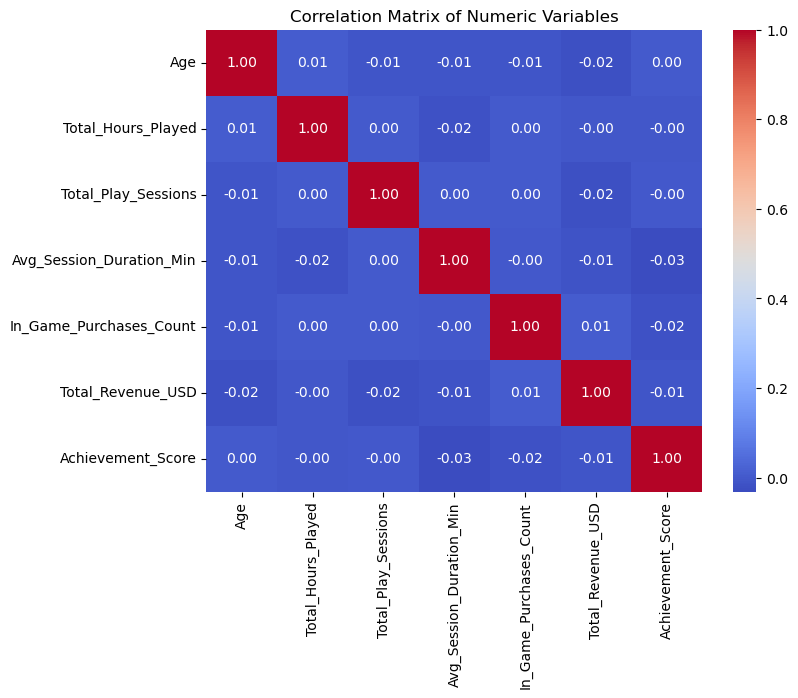

In [10]:
corr = df[['Age', 'Total_Hours_Played', 'Total_Play_Sessions', 'Avg_Session_Duration_Min', 'In_Game_Purchases_Count', 'Total_Revenue_USD', 'Achievement_Score']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

## 8️⃣ Step 8: Professional Visualization - Revenue and Sessions Over Time
📊 We will use a dual-axis line chart with clear labels, grid, and legend to compare total revenue and play sessions by signup date. This helps spot trends and seasonality.

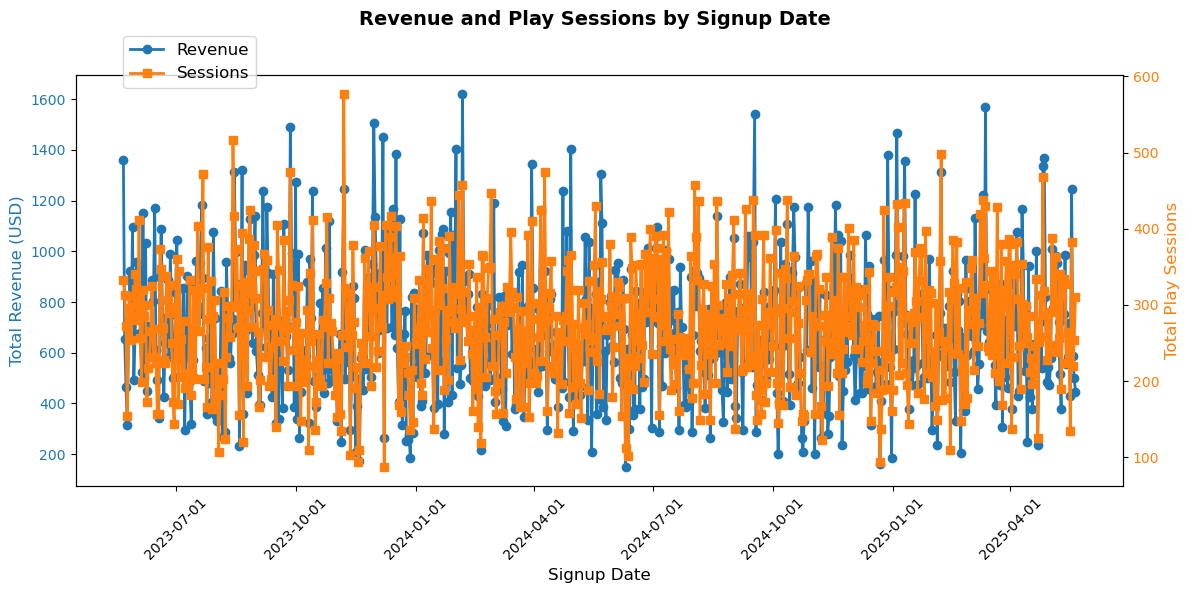

In [11]:
df['Signup_Date'] = pd.to_datetime(df['Signup_Date'])
daily = df.groupby('Signup_Date').agg({'Total_Revenue_USD': 'sum', 'Total_Play_Sessions': 'sum'})
fig, ax1 = plt.subplots(figsize=(12,6))
color1 = '#1f77b4'
color2 = '#ff7f0e'
ax1.set_xlabel('Signup Date', fontsize=12)
ax1.set_ylabel('Total Revenue (USD)', color=color1, fontsize=12)
ln1 = ax1.plot(daily.index, daily['Total_Revenue_USD'], color=color1, marker='o', label='Revenue', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
ax2 = ax1.twinx()
ax2.set_ylabel('Total Play Sessions', color=color2, fontsize=12)
ln2 = ax2.plot(daily.index, daily['Total_Play_Sessions'], color=color2, marker='s', label='Sessions', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color2)
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
fig.legend(lns, labs, loc='upper left', bbox_to_anchor=(0.1,0.95), fontsize=12)
fig.suptitle('Revenue and Play Sessions by Signup Date', fontsize=14, fontweight='bold')
fig.tight_layout(rect=[0,0,1,0.96])
plt.grid(True, which='both', axis='x', linestyle='--', alpha=0.5)
plt.show()

## 9️⃣ Step 9: Revenue Distribution by Device Type and Subscription Tier
📦 We will use boxplots with color palettes, grid, and clear titles for easy comparison of revenue across device types and subscription tiers.

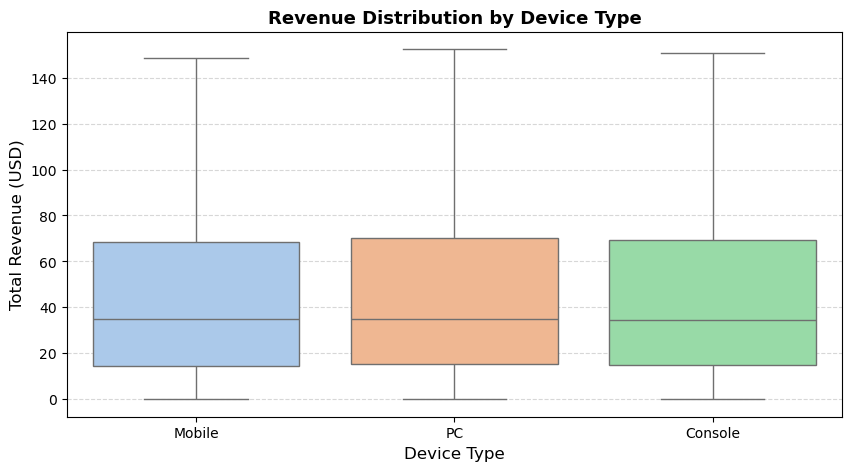

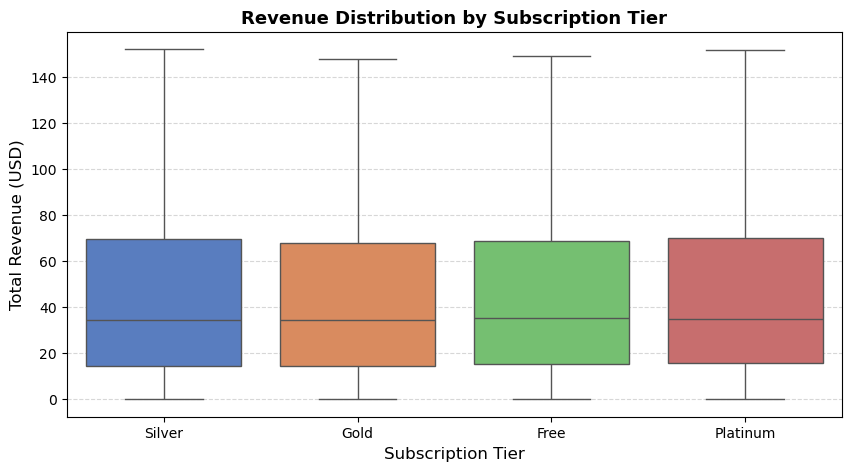

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Device_Type', y='Total_Revenue_USD', data=df, hue='Device_Type', palette='pastel', showfliers=False, legend=False)
plt.title('Revenue Distribution by Device Type', fontsize=13, fontweight='bold')
plt.xlabel('Device Type', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='Subscription_Tier', y='Total_Revenue_USD', data=df, hue='Subscription_Tier', palette='muted', showfliers=False, legend=False)
plt.title('Revenue Distribution by Subscription Tier', fontsize=13, fontweight='bold')
plt.xlabel('Subscription Tier', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## 🔟 Step 10: Average Revenue by Preferred Game Mode
🎮 A horizontal bar chart with sorted values, color, and annotation for easy comparison of average revenue by game mode.

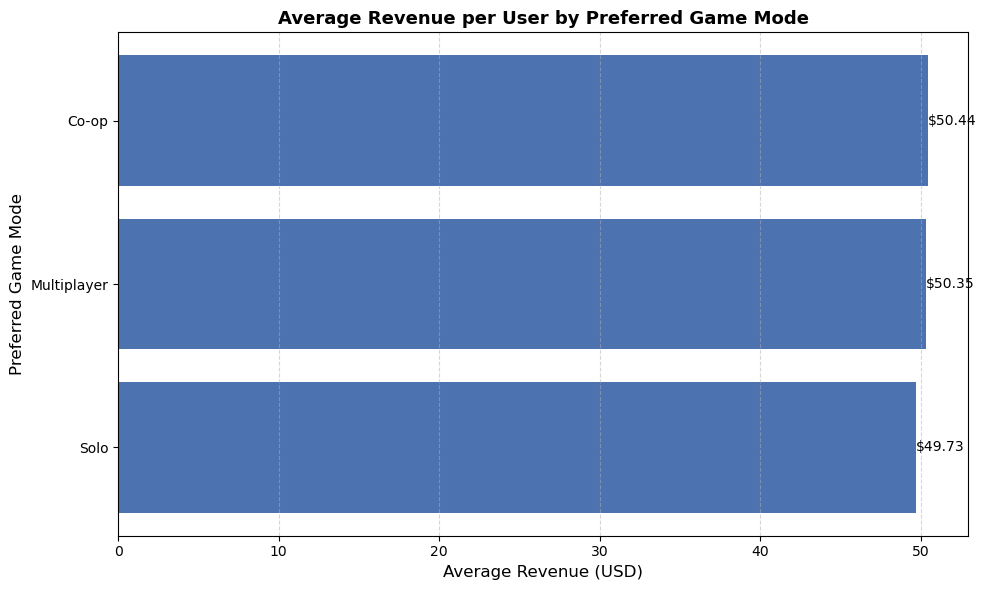

In [13]:
game_mode_avg = df.groupby('Preferred_Game_Mode')['Total_Revenue_USD'].mean().sort_values(ascending=True)
plt.figure(figsize=(10,6))
bars = plt.barh(game_mode_avg.index, game_mode_avg.values, color='#4c72b0')
plt.title('Average Revenue per User by Preferred Game Mode', fontsize=13, fontweight='bold')
plt.xlabel('Average Revenue (USD)', fontsize=12)
plt.ylabel('Preferred Game Mode', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'${bar.get_width():.2f}', va='center', ha='left', fontsize=10)
plt.tight_layout()
plt.show()

In [14]:
print(df.nlargest(5, 'Total_Revenue_USD'))

                                   User_ID      Username  \
3301  25113177-26b7-482b-9104-df3ef9f61ac1    kathleen32   
3313  8fa1741d-898a-484b-b921-f0f990a4c4f6      proberts   
4505  dbc1eaf9-b775-4f96-b4b1-dfb55dd3f98b  palmertaylor   
7141  d74a69fb-fdb4-4919-bd52-ae57e919d9e3    isaacperez   
647   c643017e-02d7-4c0a-873f-b2ae97454181       kelly21   

                            Email Signup_Date  \
3301  kimberlyjones@mckinney.info  2024-05-10   
3313     madisonfoster@juarez.net  2025-04-27   
4505      christopher96@parks.net  2024-02-06   
7141            kelly20@gmail.com  2024-03-03   
647             amyrice@gmail.com  2024-12-16   

                                           Country  Age  Gender Device_Type  \
3301                                      Anguilla   19  Female      Mobile   
3313                     Bouvet Island (Bouvetoya)   36  Female          PC   
4505                                        Norway   49    Male     Console   
7141  South Georgia and the 

## 1️⃣1️⃣ Step 11: Revenue vs. Age and Achievement Score
🧑‍💻 Scatter plots help us see if there is a relationship between user age, achievement score, and total revenue. This can inform segmentation and targeting.

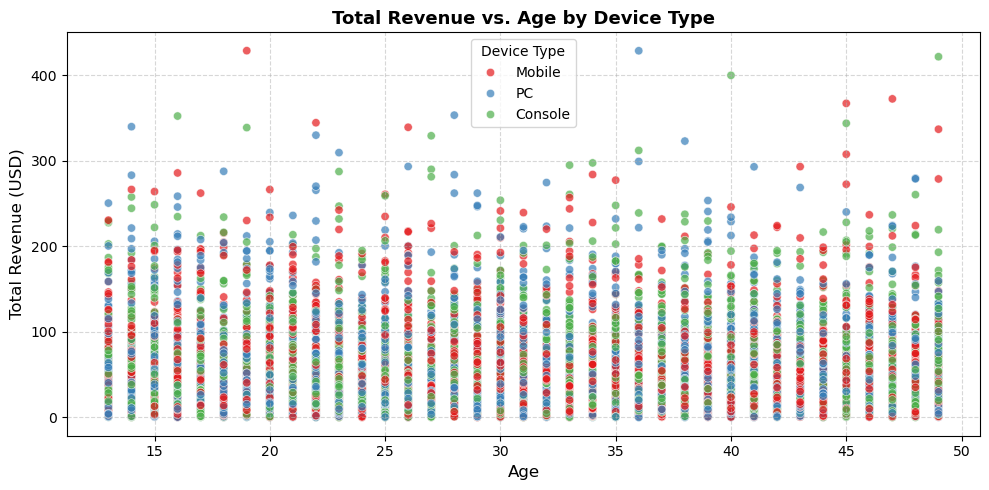

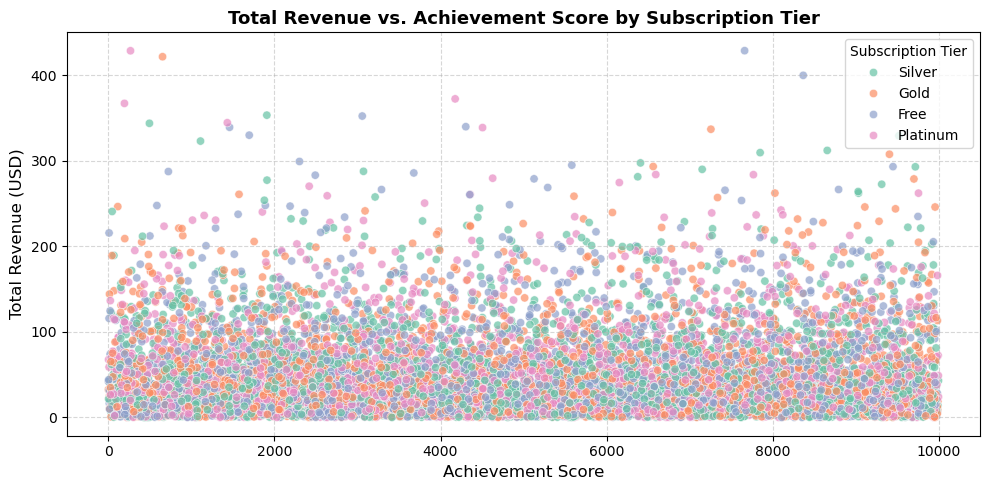

In [15]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Age', y='Total_Revenue_USD', data=df, hue='Device_Type', palette='Set1', alpha=0.7)
plt.title('Total Revenue vs. Age by Device Type', fontsize=13, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.legend(title='Device Type')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(x='Achievement_Score', y='Total_Revenue_USD', data=df, hue='Subscription_Tier', palette='Set2', alpha=0.7)
plt.title('Total Revenue vs. Achievement Score by Subscription Tier', fontsize=13, fontweight='bold')
plt.xlabel('Achievement Score', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.legend(title='Subscription Tier')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 1️⃣2️⃣ Step 12: In-Game Purchases vs. Revenue
🛒 A boxplot to show how in-game purchase count relates to total revenue. This can reveal the impact of purchases on revenue distribution.

C:\Users\srini\AppData\Local\Temp\ipykernel_7840\3725581011.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='In_Game_Purchases_Count', y='Total_Revenue_USD', data=df, palette='coolwarm', showfliers=False)


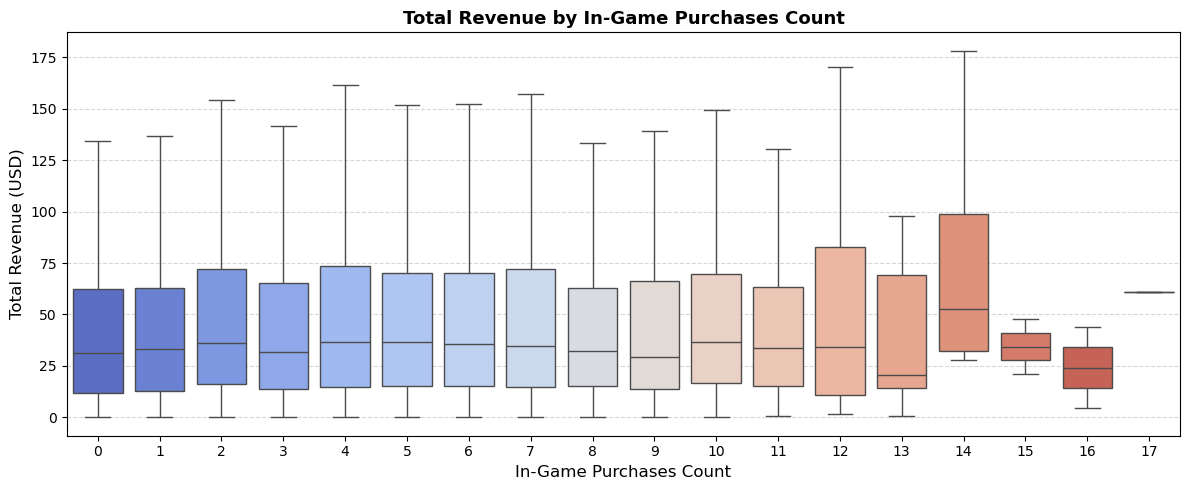

In [16]:
plt.figure(figsize=(12,5))
sns.boxplot(x='In_Game_Purchases_Count', y='Total_Revenue_USD', data=df, palette='coolwarm', showfliers=False)
plt.title('Total Revenue by In-Game Purchases Count', fontsize=13, fontweight='bold')
plt.xlabel('In-Game Purchases Count', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 1️⃣3️⃣ Step 13: Feature Engineering
🛠️ Let's create some new features to enhance our analysis and improve downstream modeling or dashboarding.

In [17]:
# Revenue per session
if 'Revenue_per_Session' not in df.columns:
    df['Revenue_per_Session'] = df['Total_Revenue_USD'] / df['Total_Play_Sessions']
# Days since signup and last login
if 'Signup_Date' in df.columns and 'Last_Login' in df.columns:
    df['Signup_Date'] = pd.to_datetime(df['Signup_Date'], errors='coerce')
    df['Last_Login'] = pd.to_datetime(df['Last_Login'], errors='coerce')
    df['Days_Since_Signup'] = (pd.Timestamp('today') - df['Signup_Date']).dt.days
    df['Days_Since_Last_Login'] = (pd.Timestamp('today') - df['Last_Login']).dt.days
df[['Revenue_per_Session', 'Days_Since_Signup', 'Days_Since_Last_Login']].head()

,Revenue_per_Session,Days_Since_Signup,Days_Since_Last_Login
0,1.309524,164,9.0
1,0.113636,447,16.0
2,2.130000,587,25.0
3,6.960526,608,20.0
4,1.155000,292,NaN


In [18]:
# Export cleaned data for dashboard use
cleaned_path = 'matiks_data.csv'
df.to_csv(cleaned_path, index=False)
print(f"Cleaned data exported to {cleaned_path}")

Cleaned data exported to matiks_data.csv
